In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cleaned.csv")
df = df[df["price"]<=1000000]
df.isnull().sum()
df.head()
df = df.drop(["Unnamed: 0","id","type","subtype","Bedroom 4 surface","Bedroom 5 surface","Surface of the plot","Garden","Garden orientation"],axis=1,errors="ignore")
df.isnull().sum()

price                                             0
zip                                               0
kitchen_type                                      0
building_condition                                0
energy_heatingType                                0
certificates_primaryEnergyConsumptionLevel        0
bedroom_count                                     0
land_surface                                      0
outdoor_terrace_exists                            0
specificities_SME_office_exists                   0
wellnessEquipment_hasSwimmingPool                 0
parking_parkingSpaceCount_indoor                  0
parking_parkingSpaceCount_outdoor                 0
condition_isNewlyBuilt                            0
Province                                          0
Number of frontages                               0
Living area                                       0
Living room surface                            7413
Kitchen surface                                8141
Bedroom 1 su

In [3]:
df["Bathrooms"].fillna(1,inplace=True)
df["Double glazing"].fillna(0,inplace=True)
df.isnull().sum()

price                                             0
zip                                               0
kitchen_type                                      0
building_condition                                0
energy_heatingType                                0
certificates_primaryEnergyConsumptionLevel        0
bedroom_count                                     0
land_surface                                      0
outdoor_terrace_exists                            0
specificities_SME_office_exists                   0
wellnessEquipment_hasSwimmingPool                 0
parking_parkingSpaceCount_indoor                  0
parking_parkingSpaceCount_outdoor                 0
condition_isNewlyBuilt                            0
Province                                          0
Number of frontages                               0
Living area                                       0
Living room surface                            7413
Kitchen surface                                8141
Bedroom 1 su

In [4]:
data = df.drop(["Living room surface","Kitchen surface","Bedroom 1 surface","Bedroom 2 surface","Bedroom 3 surface","Terrace surface","Street frontage width",
                "Energy class","Double glazing","Jacuzzi","Sauna"],axis=1,errors="ignore")

data["energy_heatingType"].unique()

array(['gas', 'fueloil', 'other', 'wood', 'electric', 'pellet', 'carbon',
       'solar'], dtype=object)

In [5]:
data = pd.get_dummies(data,columns=['energy_heatingType','Province'])
data.dtypes

price                                           int64
zip                                           float64
kitchen_type                                    int64
building_condition                              int64
certificates_primaryEnergyConsumptionLevel    float64
bedroom_count                                   int64
land_surface                                  float64
outdoor_terrace_exists                          int64
specificities_SME_office_exists                 int64
wellnessEquipment_hasSwimmingPool               int64
parking_parkingSpaceCount_indoor              float64
parking_parkingSpaceCount_outdoor             float64
condition_isNewlyBuilt                        float64
Number of frontages                           float64
Living area                                   float64
Bathrooms                                     float64
Toilets                                       float64
energy_heatingType_carbon                       uint8
energy_heatingType_electric 

In [6]:
from sklearn.preprocessing import StandardScaler

X=data.drop("price",axis=1)
y=data["price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=41,test_size=0.2)

sc = StandardScaler()
X_train["Living area"] = sc.fit_transform(X_train[["Living area"]])
X_test["Living area"] = sc.fit_transform(X_test[["Living area"]])


In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [8]:
#reg.score(X_test,y_test)

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.6241918320668406

In [10]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
print(rfr.score(X_test,y_test))
y_rfr=rfr.predict(X_test)

0.7140007986959426


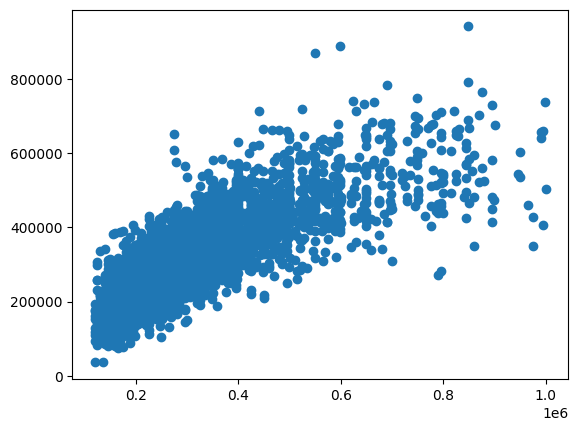

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)

In [12]:
from statistics import mean
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_rfr)

58374.367771547084